# ML match for LOFAR and the combined PanSTARRS WISE catalogue: Compute the $Q_0$

## Configuration

### Load libraries and setup

In [1]:
import numpy as np
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord, search_around_sky
from IPython.display import clear_output

In [2]:
from mltier1 import Field, Q_0, parallel_process

In [3]:
%load_ext autoreload

In [4]:
%autoreload

In [5]:
from IPython.display import clear_output

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Area limits

In [7]:
# Busy week Hatfield 2017
ra_down = 170.
ra_up = 190.
dec_down = 46.8
dec_up = 55.9

In [8]:
field = Field(170.0, 190.0, 46.8, 55.9)

## Load data

In [9]:
combined = Table.read("pw.fits")

In [10]:
lofar_all = Table.read("data/LOFAR_HBA_T1_DR1_catalog_v0.1.gaus.fits")

In [11]:
np.array(combined.colnames)

array(['AllWISE', 'objID', 'ra', 'dec', 'raErr', 'decErr', 'W1mag',
       'W1magErr', 'i', 'iErr'], 
      dtype='<U8')

In [12]:
np.array(lofar_all.colnames)

array(['Source_Name', 'RA', 'E_RA', 'E_RA_tot', 'DEC', 'E_DEC',
       'E_DEC_tot', 'Peak_flux', 'E_Peak_flux', 'E_Peak_flux_tot',
       'Total_flux', 'E_Total_flux', 'E_Total_flux_tot', 'Maj', 'E_Maj',
       'Min', 'E_Min', 'PA', 'E_PA', 'Isl_rms', 'S_Code', 'Mosaic_ID',
       'Gaus_id', 'Isl_id', 'Source_id'], 
      dtype='<U16')

### Filter catalogues

In [13]:
lofar = field.filter_catalogue(lofar_all, colnames=("RA", "DEC"))

### Sky coordinates

In [14]:
coords_combined = SkyCoord(combined['ra'], 
                           combined['dec'], 
                           unit=(u.deg, u.deg), 
                           frame='icrs')

In [15]:
coords_lofar = SkyCoord(lofar['RA'], 
                       lofar['DEC'], 
                       unit=(u.deg, u.deg), 
                       frame='icrs')

### Summary of galaxy types in the combined catalogue

In [16]:
combined_matched = (~np.isnan(combined["i"]) & 
                    ~np.isnan(combined["W1mag"]))
np.sum(combined_matched) # Matches

1339600

In [17]:
combined_panstarrs = (~np.isnan(combined["i"]) & 
                      np.isnan(combined["W1mag"]))
np.sum(combined_panstarrs) # Only PanSTARSS

3071319

In [18]:
combined_wise =(np.isnan(combined["i"]) & 
                ~np.isnan(combined["W1mag"]))
np.sum(combined_wise) # Only WISE

821044

In [19]:
combined_i = combined_matched | combined_panstarrs
combined_w1 = combined_matched | combined_wise

## $Q_0$ dependence on the radius

We will iterate 10 times for each radius. However, the error is so small that a direct computation can be accurate to 4 significant figures.

In [20]:
n_iter = 10

In [21]:
rads = list(range(1,26))

### i-band

In [22]:
q_0_comp_i = Q_0(coords_lofar, coords_combined[combined_i], field)

In [23]:
q_0_rad_i = []
for radius in rads:
    q_0_rad_aux = []
    for i in range(n_iter):
        out = q_0_comp_i(radius=radius)
        q_0_rad_aux.append(out)
    q_0_rad_i.append(np.mean(q_0_rad_aux))
    print("{:2d} {:7.5f} +/- {:7.5f} [{:7.5f} {:7.5f}]".format(radius, 
            np.mean(q_0_rad_aux), np.std(q_0_rad_aux), 
            np.min(q_0_rad_aux), np.max(q_0_rad_aux)))

 1 0.32293 +/- 0.00011 [0.32274 0.32311]
 2 0.40706 +/- 0.00016 [0.40681 0.40736]
 3 0.43463 +/- 0.00039 [0.43407 0.43531]
 4 0.45163 +/- 0.00071 [0.45053 0.45277]
 5 0.46427 +/- 0.00061 [0.46291 0.46513]
 6 0.47457 +/- 0.00067 [0.47386 0.47586]
 7 0.48394 +/- 0.00060 [0.48312 0.48503]
 8 0.49283 +/- 0.00082 [0.49112 0.49394]
 9 0.50143 +/- 0.00109 [0.50009 0.50333]
10 0.50901 +/- 0.00136 [0.50735 0.51253]
11 0.51483 +/- 0.00094 [0.51348 0.51624]
12 0.52188 +/- 0.00130 [0.51980 0.52365]
13 0.52403 +/- 0.00208 [0.51971 0.52710]
14 0.53285 +/- 0.00126 [0.53122 0.53519]
15 0.53359 +/- 0.00265 [0.52952 0.53965]
16 0.53520 +/- 0.00201 [0.53171 0.53942]
17 0.53920 +/- 0.00303 [0.53580 0.54704]
18 0.54199 +/- 0.00291 [0.53741 0.54699]
19 0.54320 +/- 0.00321 [0.53766 0.54784]
20 0.54872 +/- 0.00190 [0.54557 0.55240]
21 0.55626 +/- 0.00458 [0.54802 0.56240]
22 0.55035 +/- 0.00712 [0.53887 0.56393]
23 0.56126 +/- 0.00697 [0.54816 0.57107]
24 0.56854 +/- 0.00476 [0.56130 0.57421]
25 0.56970 +/- 0

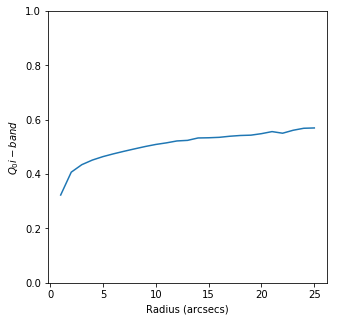

In [24]:
plt.rcParams["figure.figsize"] = (5,5)
plot(rads, q_0_rad_i)
xlabel("Radius (arcsecs)")
ylabel("$Q_0 i-band$")
ylim([0, 1]);

### W1-band

In [25]:
q_0_comp_w1 = Q_0(coords_lofar, coords_combined[combined_w1], field)

In [26]:
q_0_rad_w1 = []
for radius in rads:
    q_0_rad_aux = []
    for i in range(n_iter):
        out = q_0_comp_w1(radius=radius)
        q_0_rad_aux.append(out)
    q_0_rad_w1.append(np.mean(q_0_rad_aux))
    print("{:2d} {:7.5f} +/- {:7.5f} [{:7.5f} {:7.5f}]".format(radius, 
            np.mean(q_0_rad_aux), np.std(q_0_rad_aux), 
            np.min(q_0_rad_aux), np.max(q_0_rad_aux)))

 1 0.39366 +/- 0.00010 [0.39348 0.39380]
 2 0.52524 +/- 0.00014 [0.52505 0.52550]
 3 0.57438 +/- 0.00013 [0.57413 0.57458]
 4 0.60209 +/- 0.00042 [0.60125 0.60280]
 5 0.62362 +/- 0.00027 [0.62320 0.62401]
 6 0.64216 +/- 0.00047 [0.64136 0.64289]
 7 0.66026 +/- 0.00037 [0.65985 0.66092]
 8 0.67976 +/- 0.00060 [0.67875 0.68062]
 9 0.69942 +/- 0.00045 [0.69856 0.70000]
10 0.71500 +/- 0.00084 [0.71368 0.71647]
11 0.72777 +/- 0.00034 [0.72733 0.72835]
12 0.73687 +/- 0.00060 [0.73603 0.73802]
13 0.74425 +/- 0.00076 [0.74310 0.74531]
14 0.75317 +/- 0.00063 [0.75214 0.75437]
15 0.75844 +/- 0.00090 [0.75645 0.75973]
16 0.76225 +/- 0.00069 [0.76083 0.76328]
17 0.76460 +/- 0.00071 [0.76379 0.76585]
18 0.76753 +/- 0.00098 [0.76559 0.76880]
19 0.76903 +/- 0.00110 [0.76740 0.77138]
20 0.76909 +/- 0.00088 [0.76772 0.77085]
21 0.76947 +/- 0.00141 [0.76670 0.77236]
22 0.76735 +/- 0.00157 [0.76504 0.77048]
23 0.76757 +/- 0.00113 [0.76508 0.76955]
24 0.76743 +/- 0.00232 [0.76382 0.77018]
25 0.76172 +/- 0

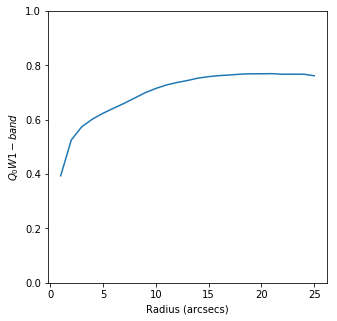

In [27]:
plt.rcParams["figure.figsize"] = (5,5)
plot(rads, q_0_rad_w1)
xlabel("Radius (arcsecs)")
ylabel("$Q_0 W1-band$")
ylim([0, 1]);